# The credit fraud dataset - Synthesizing the minority class
In this notebook it's presented a practical exercise of how to use the avilable library GANs to synthesize tabular data.
For the purpose of this exercise it has been used the Credit Fraud dataset from Kaggle, that you can find here:https: //www.kaggle.com/mlg-ulb/creditcardfraud

In [29]:
#Install pysynthetic lib
#!pip install git+https://github.com/ghoshmithun/pysynthetic.git

In [30]:
import importlib
import sys  

import pandas as pd
import numpy as np
import sklearn.cluster as cluster
import matplotlib.pyplot as plt

#If you install the above package then you should be able to use
# from pysynthetic.synthesizers.regular import VanilllaGAN
# from pysynthetic.preprocessing.regular.credit_fraud import *

#If you have installation problem. Be on the root directory so that synthesizers are found

from synthesizers.regular import VanilllaGAN
from preprocessing.regular.credit_fraud import *

model = VanilllaGAN

In [31]:
#Read the original data and have it preprocessed
data = pd.read_csv('C:/Users/mithu/Desktop/synthetic_data/csv/creditcard.csv', index_col=[0])

In [32]:
data_cols = list(data.columns[ data.columns != 'Class' ])
label_cols = ['Class']

print('Dataset columns: {}'.format(data_cols))
sorted_cols = ['V14', 'V4', 'V10', 'V17', 'V12', 'V26', 'Amount', 'V21', 'V8', 'V11', 'V7', 'V28', 'V19', 'V3', 'V22', 'V6', 'V20', 'V27', 'V16', 'V13', 'V25', 'V24', 'V18', 'V2', 'V1', 'V5', 'V15', 'V9', 'V23', 'Class']
processed_data = data[ sorted_cols ].copy()

Dataset columns: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


In [33]:
#Before training the GAN do not forget to apply the required data transformations
#To ease here we've applied a PowerTransformation
data = transformations(data)

#For the purpose of this example we will only synthesize the minority class
train_data = data.loc[ data['Class']==1 ].copy()

print("Dataset info: Number of records - {} Number of varibles - {}".format(train_data.shape[0], train_data.shape[1]))

algorithm = cluster.KMeans
args, kwds = (), {'n_clusters':2, 'random_state':0}
labels = algorithm(*args, **kwds).fit_predict(train_data[ data_cols ])

print( pd.DataFrame( [ [np.sum(labels==i)] for i in np.unique(labels) ], columns=['count'], index=np.unique(labels) ) )

fraud_w_classes = train_data.copy()
fraud_w_classes['Class'] = labels

Dataset info: Number of records - 492 Number of varibles - 30
   count
0    384
1    108


# GAN training

Below you can try to train your own generators using the available GANs architectures. You can train it either with labels (created using KMeans) or with no labels at all. 

Remeber that for this exercise in particular we've decided to synthesize only the minority class from the Credit Fraud dataset.

In [21]:
#Define the GAN and training parameters
noise_dim = 32
dim = 128
batch_size = 128

log_step = 100
epochs = 50000+1
learning_rate = 5e-4
beta_1 = 0.5
beta_2 = 0.9
models_dir = 'C:\\Users\\mithu\\Desktop\\synthetic_data\\creditcard\\save\\gan\\cache'

train_sample = fraud_w_classes.copy().reset_index(drop=True)
train_sample = pd.get_dummies(train_sample, columns=['Class'], prefix='Class', drop_first=True)
label_cols = [ i for i in train_sample.columns if 'Class' in i ]
data_cols = [ i for i in train_sample.columns if i not in label_cols ]
train_sample[ data_cols ] = train_sample[ data_cols ] / 10 # scale to random noise size, one less thing to learn
train_no_label = train_sample[ data_cols ]

gan_args = [batch_size, learning_rate, beta_1, beta_2, noise_dim, train_sample.shape[1], dim]
train_args = ['', epochs, log_step]

In [22]:
#Training the GAN model chosen: Vanilla GAN, CGAN, DCGAN, etc.
synthesizer = model(gan_args)
synthesizer.train(train_sample, train_args)

0 [D loss: 0.708184, acc.: 19.92%] [G loss: 0.707612]
generated_data
1 [D loss: 0.676857, acc.: 51.95%] [G loss: 0.703883]
2 [D loss: 0.667983, acc.: 49.22%] [G loss: 0.687297]
3 [D loss: 0.672806, acc.: 48.05%] [G loss: 0.652782]
4 [D loss: 0.698016, acc.: 47.66%] [G loss: 0.611049]
5 [D loss: 0.733644, acc.: 47.66%] [G loss: 0.583341]
6 [D loss: 0.746334, acc.: 47.27%] [G loss: 0.592623]
7 [D loss: 0.741711, acc.: 47.27%] [G loss: 0.619799]
8 [D loss: 0.742308, acc.: 47.66%] [G loss: 0.651410]
9 [D loss: 0.733595, acc.: 46.88%] [G loss: 0.700253]
10 [D loss: 0.716255, acc.: 42.97%] [G loss: 0.752850]
11 [D loss: 0.705889, acc.: 38.28%] [G loss: 0.805013]
12 [D loss: 0.680258, acc.: 62.50%] [G loss: 0.877458]
13 [D loss: 0.653515, acc.: 69.92%] [G loss: 0.952370]
14 [D loss: 0.631673, acc.: 70.31%] [G loss: 0.993268]
15 [D loss: 0.619496, acc.: 71.09%] [G loss: 1.003434]
16 [D loss: 0.614887, acc.: 72.27%] [G loss: 1.006331]
17 [D loss: 0.621553, acc.: 73.83%] [G loss: 0.949375]
18 [D

151 [D loss: 0.377232, acc.: 85.94%] [G loss: 1.560048]
152 [D loss: 0.379145, acc.: 86.33%] [G loss: 1.518744]
153 [D loss: 0.389609, acc.: 86.33%] [G loss: 1.456870]
154 [D loss: 0.401203, acc.: 84.38%] [G loss: 1.537912]
155 [D loss: 0.406467, acc.: 83.59%] [G loss: 1.363838]
156 [D loss: 0.432933, acc.: 80.08%] [G loss: 1.438763]
157 [D loss: 0.441144, acc.: 80.86%] [G loss: 1.346754]
158 [D loss: 0.442650, acc.: 81.64%] [G loss: 1.343057]
159 [D loss: 0.478898, acc.: 76.56%] [G loss: 1.246238]
160 [D loss: 0.492178, acc.: 78.12%] [G loss: 1.266484]
161 [D loss: 0.533305, acc.: 72.27%] [G loss: 1.257345]
162 [D loss: 0.573413, acc.: 68.36%] [G loss: 1.178264]
163 [D loss: 0.666572, acc.: 60.55%] [G loss: 1.068122]
164 [D loss: 0.720495, acc.: 53.91%] [G loss: 0.875386]
165 [D loss: 0.802427, acc.: 41.80%] [G loss: 0.769342]
166 [D loss: 0.797560, acc.: 41.02%] [G loss: 0.756504]
167 [D loss: 0.861761, acc.: 34.38%] [G loss: 0.721723]
168 [D loss: 0.865450, acc.: 31.25%] [G loss: 0.

298 [D loss: 0.602467, acc.: 73.44%] [G loss: 0.971391]
299 [D loss: 0.618917, acc.: 68.75%] [G loss: 0.961396]
300 [D loss: 0.588582, acc.: 77.73%] [G loss: 0.932199]
generated_data
301 [D loss: 0.599470, acc.: 71.09%] [G loss: 0.937949]
302 [D loss: 0.566041, acc.: 77.73%] [G loss: 0.918403]
303 [D loss: 0.578364, acc.: 73.83%] [G loss: 0.964588]
304 [D loss: 0.573957, acc.: 73.44%] [G loss: 0.949456]
305 [D loss: 0.588030, acc.: 67.97%] [G loss: 0.902177]
306 [D loss: 0.609545, acc.: 65.23%] [G loss: 0.850158]
307 [D loss: 0.626112, acc.: 63.28%] [G loss: 0.843702]
308 [D loss: 0.642232, acc.: 64.06%] [G loss: 0.885982]
309 [D loss: 0.629433, acc.: 66.02%] [G loss: 0.861747]
310 [D loss: 0.620703, acc.: 64.45%] [G loss: 0.916367]
311 [D loss: 0.638793, acc.: 58.59%] [G loss: 0.941872]
312 [D loss: 0.627223, acc.: 61.72%] [G loss: 0.950650]
313 [D loss: 0.668286, acc.: 52.73%] [G loss: 0.963832]
314 [D loss: 0.668374, acc.: 53.91%] [G loss: 0.959662]
315 [D loss: 0.711425, acc.: 52.3

450 [D loss: 0.619922, acc.: 71.48%] [G loss: 1.024346]
451 [D loss: 0.598020, acc.: 73.05%] [G loss: 1.042780]
452 [D loss: 0.575388, acc.: 75.39%] [G loss: 1.060884]
453 [D loss: 0.602930, acc.: 75.00%] [G loss: 1.106427]
454 [D loss: 0.575418, acc.: 78.91%] [G loss: 1.085047]
455 [D loss: 0.596957, acc.: 75.78%] [G loss: 1.068412]
456 [D loss: 0.603245, acc.: 71.88%] [G loss: 1.051481]
457 [D loss: 0.597959, acc.: 71.09%] [G loss: 1.066807]
458 [D loss: 0.609385, acc.: 67.19%] [G loss: 1.014034]
459 [D loss: 0.614754, acc.: 66.80%] [G loss: 0.963755]
460 [D loss: 0.635300, acc.: 64.06%] [G loss: 0.973328]
461 [D loss: 0.600640, acc.: 67.19%] [G loss: 0.974013]
462 [D loss: 0.617105, acc.: 63.28%] [G loss: 1.013616]
463 [D loss: 0.615439, acc.: 63.28%] [G loss: 1.023898]
464 [D loss: 0.637950, acc.: 62.50%] [G loss: 1.001297]
465 [D loss: 0.642917, acc.: 64.06%] [G loss: 1.000828]
466 [D loss: 0.657633, acc.: 61.33%] [G loss: 0.926987]
467 [D loss: 0.685308, acc.: 54.30%] [G loss: 0.

597 [D loss: 0.584066, acc.: 67.97%] [G loss: 1.233044]
598 [D loss: 0.558848, acc.: 72.27%] [G loss: 1.200154]
599 [D loss: 0.569085, acc.: 73.05%] [G loss: 1.187406]
600 [D loss: 0.566426, acc.: 73.05%] [G loss: 1.190408]
generated_data
601 [D loss: 0.604873, acc.: 67.19%] [G loss: 1.162665]
602 [D loss: 0.576014, acc.: 69.92%] [G loss: 1.152564]
603 [D loss: 0.587107, acc.: 68.36%] [G loss: 1.165535]
604 [D loss: 0.588116, acc.: 69.14%] [G loss: 1.142222]
605 [D loss: 0.586846, acc.: 70.31%] [G loss: 1.146378]
606 [D loss: 0.583504, acc.: 67.97%] [G loss: 1.187833]
607 [D loss: 0.618509, acc.: 64.45%] [G loss: 1.185274]
608 [D loss: 0.626093, acc.: 64.45%] [G loss: 1.116254]
609 [D loss: 0.601360, acc.: 59.77%] [G loss: 1.188342]
610 [D loss: 0.567109, acc.: 71.88%] [G loss: 1.105375]
611 [D loss: 0.554342, acc.: 71.09%] [G loss: 1.155609]
612 [D loss: 0.585811, acc.: 68.36%] [G loss: 1.150895]
613 [D loss: 0.557809, acc.: 73.44%] [G loss: 1.189719]
614 [D loss: 0.558986, acc.: 73.8

749 [D loss: 0.629953, acc.: 67.97%] [G loss: 1.039578]
750 [D loss: 0.582494, acc.: 69.14%] [G loss: 1.054549]
751 [D loss: 0.583862, acc.: 71.48%] [G loss: 1.113911]
752 [D loss: 0.548078, acc.: 72.27%] [G loss: 1.128489]
753 [D loss: 0.564829, acc.: 70.70%] [G loss: 1.219682]
754 [D loss: 0.573386, acc.: 69.53%] [G loss: 1.179887]
755 [D loss: 0.566547, acc.: 71.88%] [G loss: 1.150895]
756 [D loss: 0.571808, acc.: 70.31%] [G loss: 1.156908]
757 [D loss: 0.579079, acc.: 66.80%] [G loss: 1.140568]
758 [D loss: 0.597440, acc.: 66.02%] [G loss: 1.094509]
759 [D loss: 0.572140, acc.: 68.75%] [G loss: 1.116776]
760 [D loss: 0.592480, acc.: 67.58%] [G loss: 1.138611]
761 [D loss: 0.602097, acc.: 64.84%] [G loss: 1.118222]
762 [D loss: 0.595064, acc.: 63.67%] [G loss: 1.155939]
763 [D loss: 0.585528, acc.: 66.80%] [G loss: 1.096524]
764 [D loss: 0.599946, acc.: 65.62%] [G loss: 1.155413]
765 [D loss: 0.563608, acc.: 69.14%] [G loss: 1.163716]
766 [D loss: 0.568193, acc.: 69.53%] [G loss: 1.

896 [D loss: 0.529413, acc.: 73.83%] [G loss: 1.337191]
897 [D loss: 0.519103, acc.: 75.00%] [G loss: 1.356797]
898 [D loss: 0.529158, acc.: 71.88%] [G loss: 1.331833]
899 [D loss: 0.533565, acc.: 73.83%] [G loss: 1.394215]
900 [D loss: 0.541327, acc.: 71.48%] [G loss: 1.411524]
generated_data
901 [D loss: 0.532790, acc.: 72.66%] [G loss: 1.298774]
902 [D loss: 0.547494, acc.: 73.44%] [G loss: 1.311160]
903 [D loss: 0.565713, acc.: 72.66%] [G loss: 1.229259]
904 [D loss: 0.533062, acc.: 75.00%] [G loss: 1.256325]
905 [D loss: 0.553962, acc.: 73.83%] [G loss: 1.324481]
906 [D loss: 0.516990, acc.: 76.17%] [G loss: 1.345650]
907 [D loss: 0.495721, acc.: 77.34%] [G loss: 1.464972]
908 [D loss: 0.498759, acc.: 77.73%] [G loss: 1.416471]
909 [D loss: 0.495833, acc.: 77.34%] [G loss: 1.385927]
910 [D loss: 0.508296, acc.: 76.95%] [G loss: 1.354295]
911 [D loss: 0.491475, acc.: 80.86%] [G loss: 1.265193]
912 [D loss: 0.491215, acc.: 80.08%] [G loss: 1.340359]
913 [D loss: 0.518221, acc.: 76.5

1043 [D loss: 0.481649, acc.: 79.69%] [G loss: 1.327648]
1044 [D loss: 0.486195, acc.: 80.47%] [G loss: 1.403824]
1045 [D loss: 0.472963, acc.: 79.30%] [G loss: 1.433342]
1046 [D loss: 0.496981, acc.: 78.12%] [G loss: 1.460130]
1047 [D loss: 0.476295, acc.: 78.12%] [G loss: 1.464333]
1048 [D loss: 0.510160, acc.: 76.95%] [G loss: 1.344808]
1049 [D loss: 0.486017, acc.: 77.73%] [G loss: 1.414667]
1050 [D loss: 0.476425, acc.: 80.47%] [G loss: 1.424017]
1051 [D loss: 0.496795, acc.: 75.39%] [G loss: 1.446360]
1052 [D loss: 0.502650, acc.: 73.44%] [G loss: 1.422796]
1053 [D loss: 0.492442, acc.: 74.61%] [G loss: 1.402082]
1054 [D loss: 0.519901, acc.: 75.00%] [G loss: 1.421925]
1055 [D loss: 0.475942, acc.: 78.12%] [G loss: 1.501235]
1056 [D loss: 0.479746, acc.: 80.47%] [G loss: 1.498859]
1057 [D loss: 0.501037, acc.: 74.61%] [G loss: 1.514557]
1058 [D loss: 0.465204, acc.: 78.12%] [G loss: 1.406914]
1059 [D loss: 0.482312, acc.: 74.61%] [G loss: 1.476213]
1060 [D loss: 0.502458, acc.: 7

1193 [D loss: 0.463877, acc.: 78.52%] [G loss: 1.622977]
1194 [D loss: 0.431039, acc.: 81.64%] [G loss: 1.626825]
1195 [D loss: 0.444297, acc.: 79.69%] [G loss: 1.597282]
1196 [D loss: 0.445019, acc.: 81.25%] [G loss: 1.601760]
1197 [D loss: 0.453194, acc.: 80.86%] [G loss: 1.683892]
1198 [D loss: 0.423600, acc.: 80.47%] [G loss: 1.641574]
1199 [D loss: 0.445332, acc.: 80.47%] [G loss: 1.561638]
1200 [D loss: 0.472333, acc.: 80.47%] [G loss: 1.628863]
generated_data
1201 [D loss: 0.436897, acc.: 80.86%] [G loss: 1.596118]
1202 [D loss: 0.471670, acc.: 78.12%] [G loss: 1.608923]
1203 [D loss: 0.473397, acc.: 78.12%] [G loss: 1.463498]
1204 [D loss: 0.440731, acc.: 79.69%] [G loss: 1.537198]
1205 [D loss: 0.437466, acc.: 83.20%] [G loss: 1.627573]
1206 [D loss: 0.386941, acc.: 83.59%] [G loss: 1.704463]
1207 [D loss: 0.435375, acc.: 82.03%] [G loss: 1.694018]
1208 [D loss: 0.406373, acc.: 85.55%] [G loss: 1.652474]
1209 [D loss: 0.423653, acc.: 82.81%] [G loss: 1.634189]
1210 [D loss: 0.

1341 [D loss: 0.393937, acc.: 82.81%] [G loss: 1.896033]
1342 [D loss: 0.385590, acc.: 85.16%] [G loss: 1.995319]
1343 [D loss: 0.392079, acc.: 84.77%] [G loss: 1.943655]
1344 [D loss: 0.373710, acc.: 84.77%] [G loss: 1.836354]
1345 [D loss: 0.388020, acc.: 82.42%] [G loss: 1.845685]
1346 [D loss: 0.385091, acc.: 82.81%] [G loss: 1.953437]
1347 [D loss: 0.409115, acc.: 81.25%] [G loss: 1.953286]
1348 [D loss: 0.372902, acc.: 83.59%] [G loss: 1.979706]
1349 [D loss: 0.376428, acc.: 85.55%] [G loss: 1.914894]
1350 [D loss: 0.389744, acc.: 82.81%] [G loss: 2.024817]
1351 [D loss: 0.372448, acc.: 87.11%] [G loss: 1.851607]
1352 [D loss: 0.407115, acc.: 81.64%] [G loss: 1.909079]
1353 [D loss: 0.378157, acc.: 83.59%] [G loss: 1.921427]
1354 [D loss: 0.362047, acc.: 86.33%] [G loss: 2.136620]
1355 [D loss: 0.388871, acc.: 84.38%] [G loss: 1.919921]
1356 [D loss: 0.385684, acc.: 85.55%] [G loss: 1.835992]
1357 [D loss: 0.355773, acc.: 85.55%] [G loss: 2.126989]
1358 [D loss: 0.381980, acc.: 8

1489 [D loss: 0.318176, acc.: 90.62%] [G loss: 2.269967]
1490 [D loss: 0.326828, acc.: 88.28%] [G loss: 2.043873]
1491 [D loss: 0.377937, acc.: 86.72%] [G loss: 2.184928]
1492 [D loss: 0.318306, acc.: 87.89%] [G loss: 2.238846]
1493 [D loss: 0.355119, acc.: 86.72%] [G loss: 2.217505]
1494 [D loss: 0.324972, acc.: 87.50%] [G loss: 2.151394]
1495 [D loss: 0.334586, acc.: 86.72%] [G loss: 2.181294]
1496 [D loss: 0.396304, acc.: 80.86%] [G loss: 2.106333]
1497 [D loss: 0.298978, acc.: 89.45%] [G loss: 2.062545]
1498 [D loss: 0.352070, acc.: 84.38%] [G loss: 1.961622]
1499 [D loss: 0.347674, acc.: 84.77%] [G loss: 2.162574]
1500 [D loss: 0.356352, acc.: 86.33%] [G loss: 2.028629]
generated_data
1501 [D loss: 0.311912, acc.: 86.72%] [G loss: 2.037583]
1502 [D loss: 0.342462, acc.: 86.72%] [G loss: 2.149351]
1503 [D loss: 0.329617, acc.: 87.50%] [G loss: 2.225064]
1504 [D loss: 0.325773, acc.: 85.55%] [G loss: 2.166921]
1505 [D loss: 0.331200, acc.: 87.89%] [G loss: 2.167968]
1506 [D loss: 0.

1635 [D loss: 0.321010, acc.: 88.28%] [G loss: 2.449732]
1636 [D loss: 0.318756, acc.: 84.38%] [G loss: 2.653037]
1637 [D loss: 0.269655, acc.: 88.67%] [G loss: 2.393858]
1638 [D loss: 0.328508, acc.: 85.16%] [G loss: 2.427639]
1639 [D loss: 0.288034, acc.: 88.67%] [G loss: 2.404989]
1640 [D loss: 0.286612, acc.: 89.06%] [G loss: 2.422587]
1641 [D loss: 0.298689, acc.: 87.11%] [G loss: 2.517534]
1642 [D loss: 0.280672, acc.: 89.45%] [G loss: 2.317861]
1643 [D loss: 0.265678, acc.: 90.62%] [G loss: 2.369727]
1644 [D loss: 0.261184, acc.: 91.02%] [G loss: 2.576576]
1645 [D loss: 0.323231, acc.: 86.33%] [G loss: 2.561413]
1646 [D loss: 0.285648, acc.: 88.28%] [G loss: 2.674138]
1647 [D loss: 0.321565, acc.: 87.11%] [G loss: 2.445402]
1648 [D loss: 0.299019, acc.: 89.84%] [G loss: 2.581572]
1649 [D loss: 0.289244, acc.: 89.45%] [G loss: 2.517105]
1650 [D loss: 0.285700, acc.: 88.28%] [G loss: 2.525271]
1651 [D loss: 0.305513, acc.: 88.28%] [G loss: 2.433626]
1652 [D loss: 0.307223, acc.: 8

1785 [D loss: 0.302286, acc.: 86.72%] [G loss: 2.835488]
1786 [D loss: 0.276101, acc.: 88.67%] [G loss: 2.913841]
1787 [D loss: 0.253797, acc.: 92.97%] [G loss: 2.844532]
1788 [D loss: 0.261501, acc.: 90.62%] [G loss: 2.926593]
1789 [D loss: 0.310169, acc.: 84.77%] [G loss: 2.534331]
1790 [D loss: 0.255872, acc.: 87.50%] [G loss: 2.693856]
1791 [D loss: 0.304390, acc.: 88.28%] [G loss: 2.900789]
1792 [D loss: 0.245077, acc.: 89.84%] [G loss: 3.150370]
1793 [D loss: 0.270668, acc.: 87.89%] [G loss: 2.913039]
1794 [D loss: 0.290526, acc.: 88.67%] [G loss: 2.673386]
1795 [D loss: 0.252182, acc.: 89.06%] [G loss: 2.767074]
1796 [D loss: 0.278511, acc.: 88.67%] [G loss: 2.859577]
1797 [D loss: 0.264835, acc.: 90.23%] [G loss: 2.620487]
1798 [D loss: 0.268296, acc.: 89.06%] [G loss: 2.969008]
1799 [D loss: 0.275720, acc.: 89.84%] [G loss: 2.865753]
1800 [D loss: 0.225001, acc.: 92.58%] [G loss: 2.535036]
generated_data
1801 [D loss: 0.272119, acc.: 89.06%] [G loss: 2.854962]
1802 [D loss: 0.

1934 [D loss: 0.229922, acc.: 89.84%] [G loss: 3.013115]
1935 [D loss: 0.248115, acc.: 92.19%] [G loss: 3.083744]
1936 [D loss: 0.184185, acc.: 92.97%] [G loss: 3.139555]
1937 [D loss: 0.219884, acc.: 92.97%] [G loss: 2.901437]
1938 [D loss: 0.216361, acc.: 91.41%] [G loss: 3.181219]
1939 [D loss: 0.233373, acc.: 90.23%] [G loss: 3.387859]
1940 [D loss: 0.211426, acc.: 91.02%] [G loss: 3.137371]
1941 [D loss: 0.219303, acc.: 92.58%] [G loss: 3.165318]
1942 [D loss: 0.229652, acc.: 90.62%] [G loss: 3.057177]
1943 [D loss: 0.205651, acc.: 92.58%] [G loss: 3.189219]
1944 [D loss: 0.224508, acc.: 92.58%] [G loss: 3.037947]
1945 [D loss: 0.185070, acc.: 93.36%] [G loss: 3.424862]
1946 [D loss: 0.221978, acc.: 91.02%] [G loss: 3.258230]
1947 [D loss: 0.267340, acc.: 85.55%] [G loss: 3.052446]
1948 [D loss: 0.246401, acc.: 90.23%] [G loss: 3.096770]
1949 [D loss: 0.220613, acc.: 91.41%] [G loss: 3.278496]
1950 [D loss: 0.196180, acc.: 93.36%] [G loss: 2.949313]
1951 [D loss: 0.256805, acc.: 8

2079 [D loss: 0.164017, acc.: 92.58%] [G loss: 3.456633]
2080 [D loss: 0.230976, acc.: 89.84%] [G loss: 3.332180]
2081 [D loss: 0.163350, acc.: 95.31%] [G loss: 3.239243]
2082 [D loss: 0.195332, acc.: 92.58%] [G loss: 3.433371]
2083 [D loss: 0.211275, acc.: 92.97%] [G loss: 3.679409]
2084 [D loss: 0.176212, acc.: 94.14%] [G loss: 3.764473]
2085 [D loss: 0.246942, acc.: 89.06%] [G loss: 3.286104]
2086 [D loss: 0.155744, acc.: 94.53%] [G loss: 3.673987]
2087 [D loss: 0.222076, acc.: 90.23%] [G loss: 3.548528]
2088 [D loss: 0.186447, acc.: 92.58%] [G loss: 3.244123]
2089 [D loss: 0.179661, acc.: 93.36%] [G loss: 3.267447]
2090 [D loss: 0.235972, acc.: 89.06%] [G loss: 3.454094]
2091 [D loss: 0.192386, acc.: 92.19%] [G loss: 3.808830]
2092 [D loss: 0.198289, acc.: 92.58%] [G loss: 3.692807]
2093 [D loss: 0.192691, acc.: 93.75%] [G loss: 3.613789]
2094 [D loss: 0.224768, acc.: 91.02%] [G loss: 3.469846]
2095 [D loss: 0.224881, acc.: 91.41%] [G loss: 3.071462]
2096 [D loss: 0.184813, acc.: 9

2224 [D loss: 0.163082, acc.: 94.53%] [G loss: 3.961092]
2225 [D loss: 0.157518, acc.: 95.31%] [G loss: 3.908557]
2226 [D loss: 0.187783, acc.: 92.58%] [G loss: 3.977883]
2227 [D loss: 0.188295, acc.: 92.19%] [G loss: 3.420844]
2228 [D loss: 0.148415, acc.: 93.36%] [G loss: 3.799504]
2229 [D loss: 0.157597, acc.: 94.14%] [G loss: 3.793655]
2230 [D loss: 0.232457, acc.: 91.02%] [G loss: 4.028221]
2231 [D loss: 0.196027, acc.: 91.02%] [G loss: 3.591867]
2232 [D loss: 0.170417, acc.: 93.75%] [G loss: 3.662421]
2233 [D loss: 0.192928, acc.: 91.80%] [G loss: 3.921079]
2234 [D loss: 0.146168, acc.: 94.14%] [G loss: 3.850032]
2235 [D loss: 0.167834, acc.: 94.14%] [G loss: 3.486275]
2236 [D loss: 0.155626, acc.: 94.53%] [G loss: 3.911441]
2237 [D loss: 0.149114, acc.: 94.53%] [G loss: 4.156919]
2238 [D loss: 0.196862, acc.: 92.58%] [G loss: 3.542646]
2239 [D loss: 0.163118, acc.: 95.70%] [G loss: 4.014436]
2240 [D loss: 0.218420, acc.: 92.97%] [G loss: 3.893049]
2241 [D loss: 0.157265, acc.: 9

2374 [D loss: 0.177791, acc.: 92.19%] [G loss: 4.409408]
2375 [D loss: 0.154546, acc.: 94.53%] [G loss: 4.200603]
2376 [D loss: 0.226238, acc.: 92.19%] [G loss: 3.822209]
2377 [D loss: 0.126144, acc.: 95.31%] [G loss: 3.929459]
2378 [D loss: 0.198716, acc.: 91.02%] [G loss: 4.113955]
2379 [D loss: 0.144515, acc.: 94.53%] [G loss: 4.143362]
2380 [D loss: 0.161133, acc.: 94.53%] [G loss: 3.916065]
2381 [D loss: 0.168717, acc.: 94.14%] [G loss: 4.045189]
2382 [D loss: 0.148394, acc.: 94.14%] [G loss: 3.883389]
2383 [D loss: 0.121671, acc.: 94.53%] [G loss: 4.305092]
2384 [D loss: 0.216180, acc.: 90.62%] [G loss: 4.478172]
2385 [D loss: 0.141995, acc.: 94.92%] [G loss: 4.272535]
2386 [D loss: 0.160307, acc.: 93.75%] [G loss: 4.035393]
2387 [D loss: 0.167375, acc.: 93.36%] [G loss: 3.661940]
2388 [D loss: 0.197111, acc.: 90.23%] [G loss: 4.117326]
2389 [D loss: 0.141712, acc.: 94.53%] [G loss: 4.633510]
2390 [D loss: 0.179096, acc.: 92.58%] [G loss: 3.755157]
2391 [D loss: 0.161897, acc.: 9

2519 [D loss: 0.161480, acc.: 92.58%] [G loss: 4.207074]
2520 [D loss: 0.160418, acc.: 93.36%] [G loss: 4.231153]
2521 [D loss: 0.160402, acc.: 93.75%] [G loss: 4.168824]
2522 [D loss: 0.139343, acc.: 94.53%] [G loss: 3.941112]
2523 [D loss: 0.198884, acc.: 90.62%] [G loss: 4.213443]
2524 [D loss: 0.182246, acc.: 92.58%] [G loss: 4.115924]
2525 [D loss: 0.173224, acc.: 92.58%] [G loss: 3.876125]
2526 [D loss: 0.150867, acc.: 93.75%] [G loss: 4.099268]
2527 [D loss: 0.176564, acc.: 92.58%] [G loss: 4.424817]
2528 [D loss: 0.140981, acc.: 94.14%] [G loss: 4.248355]
2529 [D loss: 0.134770, acc.: 93.75%] [G loss: 4.014763]
2530 [D loss: 0.187511, acc.: 91.41%] [G loss: 4.079534]
2531 [D loss: 0.121719, acc.: 95.31%] [G loss: 4.272655]
2532 [D loss: 0.156745, acc.: 93.36%] [G loss: 3.788989]
2533 [D loss: 0.150061, acc.: 92.97%] [G loss: 4.216588]
2534 [D loss: 0.159515, acc.: 92.97%] [G loss: 4.010417]
2535 [D loss: 0.205491, acc.: 90.62%] [G loss: 4.110393]
2536 [D loss: 0.185046, acc.: 9

2666 [D loss: 0.173765, acc.: 92.19%] [G loss: 4.204556]
2667 [D loss: 0.197651, acc.: 90.62%] [G loss: 4.269594]
2668 [D loss: 0.184516, acc.: 92.19%] [G loss: 4.096571]
2669 [D loss: 0.182654, acc.: 91.41%] [G loss: 4.466523]
2670 [D loss: 0.166524, acc.: 92.19%] [G loss: 4.238554]
2671 [D loss: 0.144141, acc.: 94.14%] [G loss: 4.732454]
2672 [D loss: 0.167952, acc.: 91.02%] [G loss: 4.315811]
2673 [D loss: 0.151038, acc.: 94.53%] [G loss: 4.459002]
2674 [D loss: 0.165828, acc.: 92.58%] [G loss: 4.457161]
2675 [D loss: 0.201774, acc.: 89.84%] [G loss: 4.626894]
2676 [D loss: 0.151389, acc.: 92.97%] [G loss: 4.349660]
2677 [D loss: 0.174492, acc.: 93.36%] [G loss: 4.665293]
2678 [D loss: 0.178659, acc.: 92.97%] [G loss: 4.519691]
2679 [D loss: 0.227899, acc.: 91.80%] [G loss: 3.904797]
2680 [D loss: 0.180496, acc.: 92.58%] [G loss: 4.236683]
2681 [D loss: 0.157686, acc.: 93.36%] [G loss: 4.015974]
2682 [D loss: 0.198289, acc.: 91.02%] [G loss: 4.029435]
2683 [D loss: 0.145051, acc.: 9

2811 [D loss: 0.164785, acc.: 91.80%] [G loss: 4.303675]
2812 [D loss: 0.171871, acc.: 92.58%] [G loss: 4.046885]
2813 [D loss: 0.191837, acc.: 91.80%] [G loss: 4.268618]
2814 [D loss: 0.175812, acc.: 91.02%] [G loss: 4.411303]
2815 [D loss: 0.169002, acc.: 93.36%] [G loss: 4.305247]
2816 [D loss: 0.141339, acc.: 94.14%] [G loss: 4.246464]
2817 [D loss: 0.153276, acc.: 94.14%] [G loss: 4.110154]
2818 [D loss: 0.155125, acc.: 92.19%] [G loss: 4.669565]
2819 [D loss: 0.167492, acc.: 92.58%] [G loss: 4.174911]
2820 [D loss: 0.176194, acc.: 93.75%] [G loss: 4.297393]
2821 [D loss: 0.185499, acc.: 91.02%] [G loss: 4.490521]
2822 [D loss: 0.155805, acc.: 93.36%] [G loss: 3.472950]
2823 [D loss: 0.190785, acc.: 91.02%] [G loss: 4.180285]
2824 [D loss: 0.139473, acc.: 93.36%] [G loss: 4.308536]
2825 [D loss: 0.141553, acc.: 93.36%] [G loss: 4.222776]
2826 [D loss: 0.162746, acc.: 93.36%] [G loss: 4.341635]
2827 [D loss: 0.171506, acc.: 92.97%] [G loss: 4.115704]
2828 [D loss: 0.186054, acc.: 9

2961 [D loss: 0.163938, acc.: 93.75%] [G loss: 4.412457]
2962 [D loss: 0.167901, acc.: 93.36%] [G loss: 4.140023]
2963 [D loss: 0.160261, acc.: 93.36%] [G loss: 3.832555]
2964 [D loss: 0.164047, acc.: 92.58%] [G loss: 4.377714]
2965 [D loss: 0.195472, acc.: 92.97%] [G loss: 4.315143]
2966 [D loss: 0.176566, acc.: 92.19%] [G loss: 4.423777]
2967 [D loss: 0.146647, acc.: 94.92%] [G loss: 4.175783]
2968 [D loss: 0.140573, acc.: 94.14%] [G loss: 4.692495]
2969 [D loss: 0.182611, acc.: 93.75%] [G loss: 4.345617]
2970 [D loss: 0.167834, acc.: 92.58%] [G loss: 4.102569]
2971 [D loss: 0.171372, acc.: 92.97%] [G loss: 4.392843]
2972 [D loss: 0.189986, acc.: 92.58%] [G loss: 4.038992]
2973 [D loss: 0.170427, acc.: 94.14%] [G loss: 4.127446]
2974 [D loss: 0.156368, acc.: 93.75%] [G loss: 4.224197]
2975 [D loss: 0.158112, acc.: 93.75%] [G loss: 4.255784]
2976 [D loss: 0.137308, acc.: 93.75%] [G loss: 4.054093]
2977 [D loss: 0.185514, acc.: 93.36%] [G loss: 4.245180]
2978 [D loss: 0.193344, acc.: 9

3106 [D loss: 0.132481, acc.: 93.36%] [G loss: 4.874741]
3107 [D loss: 0.220786, acc.: 92.19%] [G loss: 4.052111]
3108 [D loss: 0.157399, acc.: 93.36%] [G loss: 4.148939]
3109 [D loss: 0.167067, acc.: 93.36%] [G loss: 4.157705]
3110 [D loss: 0.149375, acc.: 96.09%] [G loss: 4.029998]
3111 [D loss: 0.175298, acc.: 93.36%] [G loss: 3.960508]
3112 [D loss: 0.192947, acc.: 91.41%] [G loss: 3.871091]
3113 [D loss: 0.144625, acc.: 94.53%] [G loss: 4.405615]
3114 [D loss: 0.220558, acc.: 92.58%] [G loss: 4.427618]
3115 [D loss: 0.159739, acc.: 93.75%] [G loss: 4.087080]
3116 [D loss: 0.162126, acc.: 93.36%] [G loss: 3.903423]
3117 [D loss: 0.166837, acc.: 93.36%] [G loss: 4.233024]
3118 [D loss: 0.154467, acc.: 93.75%] [G loss: 4.265500]
3119 [D loss: 0.164234, acc.: 93.36%] [G loss: 4.102575]
3120 [D loss: 0.133633, acc.: 94.14%] [G loss: 4.511190]
3121 [D loss: 0.138803, acc.: 94.14%] [G loss: 3.885575]
3122 [D loss: 0.173337, acc.: 93.75%] [G loss: 3.835427]
3123 [D loss: 0.117527, acc.: 9

3252 [D loss: 0.190451, acc.: 92.19%] [G loss: 4.095120]
3253 [D loss: 0.186386, acc.: 92.97%] [G loss: 4.461010]
3254 [D loss: 0.156000, acc.: 93.36%] [G loss: 3.976826]
3255 [D loss: 0.165795, acc.: 94.14%] [G loss: 3.859867]
3256 [D loss: 0.188846, acc.: 92.97%] [G loss: 3.893542]
3257 [D loss: 0.151619, acc.: 94.53%] [G loss: 4.419079]
3258 [D loss: 0.150344, acc.: 94.92%] [G loss: 4.161718]
3259 [D loss: 0.160324, acc.: 94.14%] [G loss: 4.592443]
3260 [D loss: 0.152032, acc.: 94.14%] [G loss: 4.082662]
3261 [D loss: 0.141787, acc.: 94.53%] [G loss: 4.114638]
3262 [D loss: 0.147870, acc.: 94.92%] [G loss: 4.289833]
3263 [D loss: 0.168317, acc.: 92.97%] [G loss: 4.098369]
3264 [D loss: 0.137888, acc.: 94.14%] [G loss: 4.453391]
3265 [D loss: 0.158050, acc.: 92.19%] [G loss: 4.440106]
3266 [D loss: 0.188356, acc.: 92.58%] [G loss: 4.648569]
3267 [D loss: 0.173276, acc.: 92.97%] [G loss: 4.713699]
3268 [D loss: 0.176184, acc.: 93.75%] [G loss: 3.898857]
3269 [D loss: 0.146478, acc.: 9

3397 [D loss: 0.168028, acc.: 93.36%] [G loss: 4.564502]
3398 [D loss: 0.132047, acc.: 94.92%] [G loss: 3.944614]
3399 [D loss: 0.157954, acc.: 93.36%] [G loss: 4.592206]
3400 [D loss: 0.153458, acc.: 93.75%] [G loss: 4.374906]
generated_data
3401 [D loss: 0.188519, acc.: 92.97%] [G loss: 3.856504]
3402 [D loss: 0.164067, acc.: 94.14%] [G loss: 3.826235]
3403 [D loss: 0.170226, acc.: 92.97%] [G loss: 4.272193]
3404 [D loss: 0.157864, acc.: 92.97%] [G loss: 3.925436]
3405 [D loss: 0.154186, acc.: 94.53%] [G loss: 3.991142]
3406 [D loss: 0.187821, acc.: 91.80%] [G loss: 4.343895]
3407 [D loss: 0.185352, acc.: 94.14%] [G loss: 4.445757]
3408 [D loss: 0.194943, acc.: 93.36%] [G loss: 3.850835]
3409 [D loss: 0.160649, acc.: 94.53%] [G loss: 3.891565]
3410 [D loss: 0.154283, acc.: 93.36%] [G loss: 4.180830]
3411 [D loss: 0.181495, acc.: 93.36%] [G loss: 4.311335]
3412 [D loss: 0.189605, acc.: 92.19%] [G loss: 4.040942]
3413 [D loss: 0.148144, acc.: 94.53%] [G loss: 4.462702]
3414 [D loss: 0.

3542 [D loss: 0.145907, acc.: 94.92%] [G loss: 4.421159]
3543 [D loss: 0.196475, acc.: 91.02%] [G loss: 4.268882]
3544 [D loss: 0.162440, acc.: 93.36%] [G loss: 3.879788]
3545 [D loss: 0.178203, acc.: 92.58%] [G loss: 4.313321]
3546 [D loss: 0.188388, acc.: 93.36%] [G loss: 4.204034]
3547 [D loss: 0.157620, acc.: 94.14%] [G loss: 4.003558]
3548 [D loss: 0.181660, acc.: 93.36%] [G loss: 4.090869]
3549 [D loss: 0.161987, acc.: 93.75%] [G loss: 4.460238]
3550 [D loss: 0.197918, acc.: 93.75%] [G loss: 4.478737]
3551 [D loss: 0.197672, acc.: 93.36%] [G loss: 3.683636]
3552 [D loss: 0.157658, acc.: 94.14%] [G loss: 4.121589]
3553 [D loss: 0.179007, acc.: 92.19%] [G loss: 4.042754]
3554 [D loss: 0.170030, acc.: 92.97%] [G loss: 3.828314]
3555 [D loss: 0.145648, acc.: 94.92%] [G loss: 4.480262]
3556 [D loss: 0.143202, acc.: 93.36%] [G loss: 3.772294]
3557 [D loss: 0.190487, acc.: 92.19%] [G loss: 4.086559]
3558 [D loss: 0.174659, acc.: 92.58%] [G loss: 3.921173]
3559 [D loss: 0.171443, acc.: 9

3689 [D loss: 0.157163, acc.: 92.97%] [G loss: 3.906769]
3690 [D loss: 0.128208, acc.: 94.92%] [G loss: 4.429345]
3691 [D loss: 0.149454, acc.: 93.75%] [G loss: 4.003145]
3692 [D loss: 0.140202, acc.: 93.36%] [G loss: 3.849030]
3693 [D loss: 0.143269, acc.: 92.19%] [G loss: 4.082685]
3694 [D loss: 0.159413, acc.: 92.97%] [G loss: 4.265634]
3695 [D loss: 0.147123, acc.: 94.14%] [G loss: 4.377156]
3696 [D loss: 0.178218, acc.: 93.36%] [G loss: 3.746192]
3697 [D loss: 0.127320, acc.: 94.92%] [G loss: 4.269431]
3698 [D loss: 0.171101, acc.: 91.80%] [G loss: 4.220787]
3699 [D loss: 0.168009, acc.: 94.14%] [G loss: 3.918729]
3700 [D loss: 0.125983, acc.: 93.75%] [G loss: 4.332514]
generated_data
3701 [D loss: 0.173485, acc.: 93.75%] [G loss: 3.764678]
3702 [D loss: 0.131934, acc.: 94.92%] [G loss: 3.971305]
3703 [D loss: 0.152638, acc.: 94.92%] [G loss: 4.003002]
3704 [D loss: 0.158377, acc.: 93.36%] [G loss: 3.775578]
3705 [D loss: 0.154330, acc.: 95.70%] [G loss: 3.973878]
3706 [D loss: 0.

3837 [D loss: 0.120412, acc.: 94.53%] [G loss: 4.125176]
3838 [D loss: 0.163972, acc.: 95.31%] [G loss: 4.148630]
3839 [D loss: 0.127761, acc.: 93.75%] [G loss: 4.452033]
3840 [D loss: 0.183382, acc.: 92.58%] [G loss: 3.806397]
3841 [D loss: 0.153759, acc.: 94.53%] [G loss: 4.316216]
3842 [D loss: 0.169476, acc.: 92.19%] [G loss: 4.343718]
3843 [D loss: 0.170471, acc.: 94.14%] [G loss: 3.749621]
3844 [D loss: 0.178078, acc.: 93.36%] [G loss: 3.783990]
3845 [D loss: 0.168259, acc.: 93.75%] [G loss: 3.620739]
3846 [D loss: 0.187003, acc.: 92.97%] [G loss: 4.008784]
3847 [D loss: 0.177922, acc.: 94.92%] [G loss: 4.065031]
3848 [D loss: 0.152849, acc.: 94.14%] [G loss: 3.991217]
3849 [D loss: 0.158428, acc.: 92.58%] [G loss: 3.718955]
3850 [D loss: 0.113278, acc.: 96.09%] [G loss: 4.315406]
3851 [D loss: 0.174471, acc.: 94.53%] [G loss: 4.010415]
3852 [D loss: 0.155528, acc.: 93.36%] [G loss: 4.504374]
3853 [D loss: 0.118718, acc.: 96.09%] [G loss: 4.392787]
3854 [D loss: 0.152482, acc.: 9

3983 [D loss: 0.155943, acc.: 93.75%] [G loss: 3.924506]
3984 [D loss: 0.138399, acc.: 93.36%] [G loss: 4.882192]
3985 [D loss: 0.156618, acc.: 94.92%] [G loss: 4.125605]
3986 [D loss: 0.151541, acc.: 94.14%] [G loss: 3.918293]
3987 [D loss: 0.146300, acc.: 94.14%] [G loss: 4.363581]
3988 [D loss: 0.163097, acc.: 93.36%] [G loss: 4.124690]
3989 [D loss: 0.178024, acc.: 92.97%] [G loss: 3.641915]
3990 [D loss: 0.148890, acc.: 94.92%] [G loss: 4.565927]
3991 [D loss: 0.123735, acc.: 94.14%] [G loss: 4.624172]
3992 [D loss: 0.135501, acc.: 94.92%] [G loss: 4.149174]
3993 [D loss: 0.165322, acc.: 91.41%] [G loss: 5.452869]
3994 [D loss: 0.135833, acc.: 94.92%] [G loss: 3.788874]
3995 [D loss: 0.141506, acc.: 93.36%] [G loss: 4.212328]
3996 [D loss: 0.139251, acc.: 94.53%] [G loss: 4.593530]
3997 [D loss: 0.177314, acc.: 93.36%] [G loss: 4.149267]
3998 [D loss: 0.167506, acc.: 94.14%] [G loss: 4.101649]
3999 [D loss: 0.167757, acc.: 94.14%] [G loss: 4.183379]
4000 [D loss: 0.151911, acc.: 9

4128 [D loss: 0.152474, acc.: 93.36%] [G loss: 4.234435]
4129 [D loss: 0.171416, acc.: 93.36%] [G loss: 4.045554]
4130 [D loss: 0.145824, acc.: 93.36%] [G loss: 4.509463]
4131 [D loss: 0.102476, acc.: 96.48%] [G loss: 4.346224]
4132 [D loss: 0.153328, acc.: 94.53%] [G loss: 4.018329]
4133 [D loss: 0.109859, acc.: 95.31%] [G loss: 5.507047]
4134 [D loss: 0.139946, acc.: 94.92%] [G loss: 3.798937]
4135 [D loss: 0.113171, acc.: 95.31%] [G loss: 4.278902]
4136 [D loss: 0.164827, acc.: 92.97%] [G loss: 4.585850]
4137 [D loss: 0.143610, acc.: 92.97%] [G loss: 4.241179]
4138 [D loss: 0.195340, acc.: 92.19%] [G loss: 3.826317]
4139 [D loss: 0.156981, acc.: 92.97%] [G loss: 4.727901]
4140 [D loss: 0.134006, acc.: 94.53%] [G loss: 4.157179]
4141 [D loss: 0.122696, acc.: 95.31%] [G loss: 4.112624]
4142 [D loss: 0.139262, acc.: 93.36%] [G loss: 4.469786]
4143 [D loss: 0.167316, acc.: 95.31%] [G loss: 3.705744]
4144 [D loss: 0.136941, acc.: 94.53%] [G loss: 5.037583]
4145 [D loss: 0.131806, acc.: 9

4273 [D loss: 0.170985, acc.: 93.75%] [G loss: 4.041205]
4274 [D loss: 0.147181, acc.: 95.31%] [G loss: 4.326773]
4275 [D loss: 0.166318, acc.: 93.75%] [G loss: 3.704557]
4276 [D loss: 0.155551, acc.: 94.53%] [G loss: 4.127865]
4277 [D loss: 0.148764, acc.: 93.75%] [G loss: 4.246724]
4278 [D loss: 0.126078, acc.: 94.14%] [G loss: 4.653366]
4279 [D loss: 0.143112, acc.: 92.97%] [G loss: 4.396229]
4280 [D loss: 0.184867, acc.: 94.14%] [G loss: 3.862192]
4281 [D loss: 0.145882, acc.: 94.53%] [G loss: 4.833875]
4282 [D loss: 0.142330, acc.: 94.14%] [G loss: 4.657614]
4283 [D loss: 0.156034, acc.: 92.97%] [G loss: 3.814893]
4284 [D loss: 0.105971, acc.: 95.31%] [G loss: 5.618500]
4285 [D loss: 0.119982, acc.: 95.70%] [G loss: 3.953337]
4286 [D loss: 0.141810, acc.: 93.75%] [G loss: 4.702420]
4287 [D loss: 0.153668, acc.: 93.75%] [G loss: 4.686306]
4288 [D loss: 0.150200, acc.: 95.31%] [G loss: 3.575279]
4289 [D loss: 0.134558, acc.: 95.31%] [G loss: 4.036023]
4290 [D loss: 0.166655, acc.: 9

4418 [D loss: 0.131976, acc.: 93.36%] [G loss: 4.705169]
4419 [D loss: 0.155518, acc.: 92.97%] [G loss: 4.167409]
4420 [D loss: 0.158761, acc.: 94.53%] [G loss: 3.997213]
4421 [D loss: 0.143367, acc.: 95.31%] [G loss: 5.061302]
4422 [D loss: 0.157166, acc.: 95.31%] [G loss: 4.674171]
4423 [D loss: 0.165611, acc.: 95.31%] [G loss: 4.182176]
4424 [D loss: 0.139385, acc.: 94.14%] [G loss: 4.295226]
4425 [D loss: 0.147778, acc.: 94.53%] [G loss: 4.613157]
4426 [D loss: 0.125517, acc.: 95.70%] [G loss: 4.430010]
4427 [D loss: 0.180262, acc.: 92.58%] [G loss: 4.697774]
4428 [D loss: 0.159952, acc.: 94.53%] [G loss: 3.986592]
4429 [D loss: 0.178420, acc.: 92.58%] [G loss: 4.360912]
4430 [D loss: 0.156067, acc.: 94.14%] [G loss: 4.063845]
4431 [D loss: 0.115428, acc.: 95.31%] [G loss: 4.665058]
4432 [D loss: 0.141816, acc.: 94.92%] [G loss: 4.316233]
4433 [D loss: 0.141895, acc.: 94.14%] [G loss: 4.931767]
4434 [D loss: 0.146034, acc.: 95.31%] [G loss: 4.870321]
4435 [D loss: 0.117051, acc.: 9

4563 [D loss: 0.164099, acc.: 93.75%] [G loss: 4.137345]
4564 [D loss: 0.133209, acc.: 94.92%] [G loss: 5.323315]
4565 [D loss: 0.169677, acc.: 92.58%] [G loss: 3.655450]
4566 [D loss: 0.131082, acc.: 96.09%] [G loss: 4.373308]
4567 [D loss: 0.129510, acc.: 95.70%] [G loss: 5.336249]
4568 [D loss: 0.142943, acc.: 95.31%] [G loss: 4.101878]
4569 [D loss: 0.130297, acc.: 95.31%] [G loss: 4.403398]
4570 [D loss: 0.131506, acc.: 94.92%] [G loss: 4.982047]
4571 [D loss: 0.135296, acc.: 94.14%] [G loss: 4.542183]
4572 [D loss: 0.163608, acc.: 95.31%] [G loss: 3.904692]
4573 [D loss: 0.133948, acc.: 95.31%] [G loss: 5.390305]
4574 [D loss: 0.136108, acc.: 93.75%] [G loss: 4.115503]
4575 [D loss: 0.179796, acc.: 92.58%] [G loss: 4.057840]
4576 [D loss: 0.138007, acc.: 94.53%] [G loss: 4.675314]
4577 [D loss: 0.125338, acc.: 94.53%] [G loss: 4.723120]
4578 [D loss: 0.106685, acc.: 96.48%] [G loss: 4.511110]
4579 [D loss: 0.126920, acc.: 94.53%] [G loss: 5.327447]
4580 [D loss: 0.159579, acc.: 9

4710 [D loss: 0.171608, acc.: 92.97%] [G loss: 4.189969]
4711 [D loss: 0.126987, acc.: 95.70%] [G loss: 5.320764]
4712 [D loss: 0.117872, acc.: 95.70%] [G loss: 5.138933]
4713 [D loss: 0.093269, acc.: 96.09%] [G loss: 5.103094]
4714 [D loss: 0.124555, acc.: 96.48%] [G loss: 4.721308]
4715 [D loss: 0.132963, acc.: 94.53%] [G loss: 4.547222]
4716 [D loss: 0.130536, acc.: 94.53%] [G loss: 4.574419]
4717 [D loss: 0.123462, acc.: 95.70%] [G loss: 4.998113]
4718 [D loss: 0.151249, acc.: 94.92%] [G loss: 4.648155]
4719 [D loss: 0.169830, acc.: 94.53%] [G loss: 4.336361]
4720 [D loss: 0.152404, acc.: 94.14%] [G loss: 4.002844]
4721 [D loss: 0.146498, acc.: 95.70%] [G loss: 4.160844]
4722 [D loss: 0.149941, acc.: 94.53%] [G loss: 4.594802]
4723 [D loss: 0.140341, acc.: 94.14%] [G loss: 5.374451]
4724 [D loss: 0.109327, acc.: 95.70%] [G loss: 4.395280]
4725 [D loss: 0.155592, acc.: 94.53%] [G loss: 3.856905]
4726 [D loss: 0.108367, acc.: 95.31%] [G loss: 5.584487]
4727 [D loss: 0.125684, acc.: 9

4856 [D loss: 0.171267, acc.: 94.14%] [G loss: 3.854200]
4857 [D loss: 0.128289, acc.: 94.53%] [G loss: 4.539954]
4858 [D loss: 0.127554, acc.: 94.53%] [G loss: 4.605717]
4859 [D loss: 0.159279, acc.: 93.75%] [G loss: 3.772150]
4860 [D loss: 0.116905, acc.: 93.75%] [G loss: 7.032329]
4861 [D loss: 0.111453, acc.: 94.92%] [G loss: 4.608753]
4862 [D loss: 0.118668, acc.: 94.53%] [G loss: 4.544944]
4863 [D loss: 0.115795, acc.: 96.09%] [G loss: 5.452934]
4864 [D loss: 0.123933, acc.: 95.70%] [G loss: 4.258301]
4865 [D loss: 0.146000, acc.: 94.14%] [G loss: 4.470608]
4866 [D loss: 0.114474, acc.: 95.31%] [G loss: 5.742833]
4867 [D loss: 0.181351, acc.: 92.97%] [G loss: 4.286361]
4868 [D loss: 0.138991, acc.: 94.92%] [G loss: 3.999880]
4869 [D loss: 0.155579, acc.: 93.36%] [G loss: 5.318965]
4870 [D loss: 0.113987, acc.: 95.70%] [G loss: 4.134007]
4871 [D loss: 0.153084, acc.: 96.48%] [G loss: 4.055071]
4872 [D loss: 0.105346, acc.: 94.53%] [G loss: 5.109988]
4873 [D loss: 0.097630, acc.: 9

generated_data


In [23]:
#Generator discription
synthesizer.generator.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(128, 32)]               0         
_________________________________________________________________
dense_8 (Dense)              (128, 128)                4224      
_________________________________________________________________
dense_9 (Dense)              (128, 256)                33024     
_________________________________________________________________
dense_10 (Dense)             (128, 512)                131584    
_________________________________________________________________
dense_11 (Dense)             (128, 30)                 15390     
Total params: 184,222
Trainable params: 184,222
Non-trainable params: 0
_________________________________________________________________


In [24]:
#Discriminator description
synthesizer.discriminator.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(128, 30)]               0         
_________________________________________________________________
dense_12 (Dense)             (128, 512)                15872     
_________________________________________________________________
dropout_2 (Dropout)          (128, 512)                0         
_________________________________________________________________
dense_13 (Dense)             (128, 256)                131328    
_________________________________________________________________
dropout_3 (Dropout)          (128, 256)                0         
_________________________________________________________________
dense_14 (Dense)             (128, 128)                32896     
_________________________________________________________________
dense_15 (Dense)             (128, 1)                  129 

In [25]:
# !mkdir -p C:\\Users\\mithu\\Desktop\\synthetic_data\\creditcard\\save\\gan

In [26]:
#You can easily save the trained generator and loaded it aftwerwards
synthesizer.save("C:\\Users\\mithu\\Desktop\\synthetic_data\\creditcard\\save\\gan\\generator_fraud")

In [27]:
models = {'GAN': ['GAN', False, synthesizer.generator]}

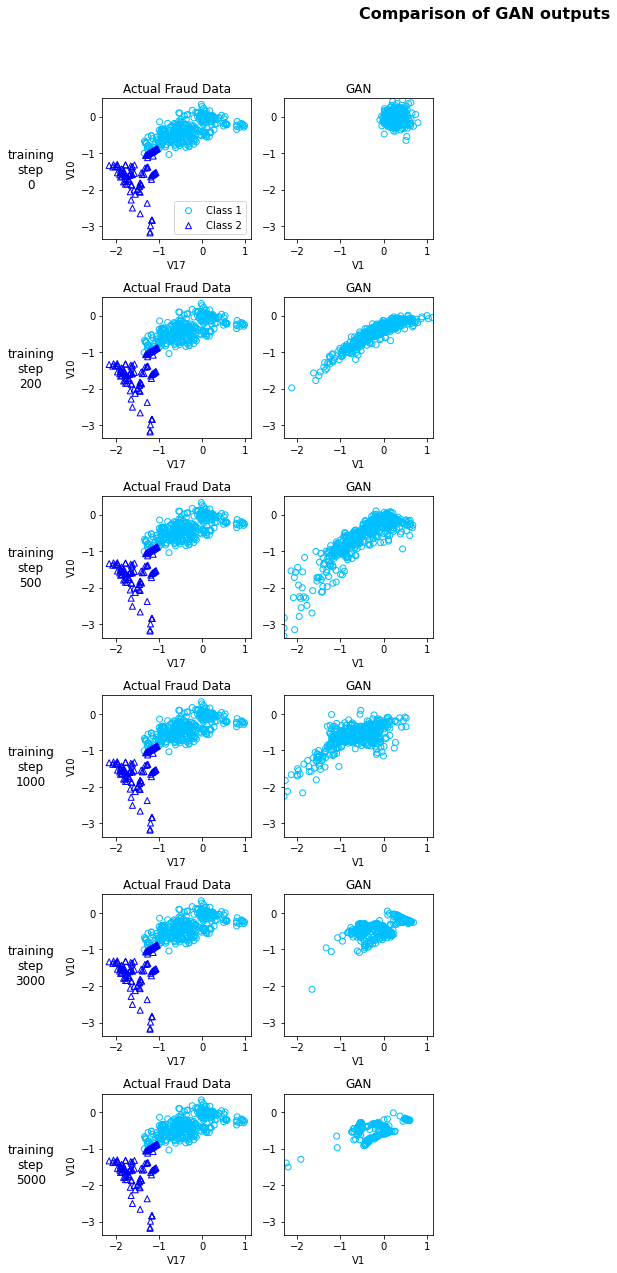

In [28]:
# Setup parameters visualization parameters
seed = 17
test_size = 492 # number of fraud cases
noise_dim = 32

np.random.seed(seed)
z = np.random.normal(size=(test_size, noise_dim))
real = synthesizer.get_data_batch(train=train_sample, batch_size=test_size, seed=seed)
real_samples = pd.DataFrame(real, columns=data_cols+label_cols)
labels = fraud_w_classes['Class']

model_names = ['GAN']
colors = ['deepskyblue','blue']
markers = ['o','^']
class_labels = ['Class 1','Class 2']

col1, col2 = 'V17', 'V10'

base_dir = 'cache/'

#Actual fraud data visualization
model_steps = [ 0, 2000, 5000,10000,30000,5000]
rows = len(model_steps)
columns = 5

axarr = [[]]*len(model_steps)

fig = plt.figure(figsize=(14,rows*3))

for model_step_ix, model_step in enumerate(model_steps):        
    axarr[model_step_ix] = plt.subplot(rows, columns, model_step_ix*columns + 1)
    
    for group, color, marker, label in zip(real_samples.groupby('Class_1'), colors, markers, class_labels ):
        plt.scatter( group[1][[col1]], group[1][[col2]], 
                         label=label, marker=marker, edgecolors=color, facecolors='none' )
    
    plt.title('Actual Fraud Data')
    plt.ylabel(col2) # Only add y label to left plot
    plt.xlabel(col1)
    xlims, ylims = axarr[model_step_ix].get_xlim(), axarr[model_step_ix].get_ylim()
    
    if model_step_ix == 0: 
        legend = plt.legend()
        legend.get_frame().set_facecolor('white')
    
    for i, model_name in enumerate( model_names[:] ):

        [model_name, with_class, generator_model] = models[model_name]

        generator_model.load_weights( base_dir + '_generator_model_weights_step_'+str(model_step)+'.h5')

        ax = plt.subplot(rows, columns, model_step_ix*columns + 1 + (i+1) )

        if with_class:
            g_z = generator_model.predict([z, labels])
            gen_samples = pd.DataFrame(g_z, columns=data_cols+label_cols)
            for group, color, marker, label in zip( gen_samples.groupby('Class_1'), colors, markers, class_labels ):
                plt.scatter( group[1][[col1]], group[1][[col2]], 
                                 label=label, marker=marker, edgecolors=color, facecolors='none' )
        else:
            g_z = generator_model.predict(z)
            gen_samples = pd.DataFrame(g_z, columns=data_cols+['label'])
            gen_samples.to_csv('Generated_sample.csv')
            plt.scatter( gen_samples[[col1]], gen_samples[[col2]], 
                             label=class_labels[0], marker=markers[0], edgecolors=colors[0], facecolors='none' )
        plt.title(model_name)   
        plt.xlabel(data_cols[0])
        ax.set_xlim(xlims), ax.set_ylim(ylims)

plt.suptitle('Comparison of GAN outputs', size=16, fontweight='bold')
plt.tight_layout(rect=[0.075,0,1,0.95])

# Adding text labels for traning steps
vpositions = np.array([ i._position.bounds[1] for i in axarr ])
vpositions += ((vpositions[0] - vpositions[1]) * 0.35 )
for model_step_ix, model_step in enumerate( model_steps ):
    fig.text( 0.05, vpositions[model_step_ix], 'training\nstep\n'+str(model_step), ha='center', va='center', size=12)

plt.savefig('Comparison_of_GAN_outputs.png')
